# `Spark SQL`

----

### `Table of Contents`
* Define schema
* Read data
* Create temporary view of table
* View columns
* Create new column
* Explore and Visualize data

---

---
### `Create Spark Session`

---

In [1]:
from pyspark.sql import SparkSession

In [2]:
# Create SparkSession object
spark = SparkSession.builder \
        .getOrCreate()

----
### `Understanding the data`

**`Census data - `**

![](images/census_data.png)

**`Columns - `**

* age
* workclass
* fnlwgt
* education
* education-num
* marital-status
* occupation
* relationship
* race
* sex
* capital-gain
* capital-loss
* hours-per-week
* native-country

----
### `Define schema`

----

In [3]:
# Import required libraries
from pyspark.sql.types import StringType, IntegerType, StructType, StructField, DoubleType

In [4]:
# Define schema
finalSchema = StructType([StructField('age', DoubleType(),True),
                              StructField('workclass',StringType(),True),
                              StructField('fnlwgt', DoubleType(),True),
                              StructField('education', StringType(), True),
                              StructField('education_num', DoubleType(), True),
                              StructField('marital_status', StringType(), True),
                              StructField('occupation', StringType(), True),
                              StructField(gspm2v5ybx26wlkh7i9doqhbk8csd7ko'relationship', StringType(), True),
                              StructField('race', StringType(), True),
                              StructField('sex', StringType(), True),
                              StructField('capital_gain', DoubleType(), True),
                              StructField('capital_loss', DoubleType(), True),
                              StructField('hours_per_week', DoubleType(), True),
                              StructField('native_country', StringType(), True),
                              StructField('income', StringType(), True)
                             ])

---
### `Read data`

----

In [5]:
# Creating dataframe from the data
df = spark.read.csv('data/census.csv',schema=finalSchema,header=True)

In [6]:
# Schema of dataframe
df.printSchema()

root
 |-- age: double (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: double (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



---
### `Create temporary view of table`

Create or replace a temporary view for dataframe using [**`createOrReplaceTempView()`**](http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=withcolumn#pyspark.sql.DataFrame.createOrReplaceTempView) with the provided name.

----

In [7]:
# Create view for the dataframe
df.createOrReplaceTempView("census")

In [8]:
# View columns
spark.sql("show columns from census").show()

+--------------+
|      col_name|
+--------------+
|           age|
|     workclass|
|        fnlwgt|
|     education|
| education_num|
|marital_status|
|    occupation|
|  relationship|
|          race|
|           sex|
|  capital_gain|
|  capital_loss|
|hours_per_week|
|native_country|
|        income|
+--------------+



---
### `View columns`

View select columns from the temporary table.

---

In [9]:
# View select columns
spark.sql("select age, workclass, fnlwgt, education, income from census")

age,workclass,fnlwgt,education,income
50.0,Self-emp-not-inc,83311.0,Bachelors,<=50K
38.0,Private,215646.0,HS-grad,<=50K
53.0,Private,234721.0,11th,<=50K
28.0,Private,338409.0,Bachelors,<=50K
37.0,Private,284582.0,Masters,<=50K
49.0,Private,160187.0,9th,<=50K
52.0,Self-emp-not-inc,209642.0,HS-grad,>50K
31.0,Private,45781.0,Masters,>50K
42.0,Private,159449.0,Bachelors,>50K
37.0,Private,280464.0,Some-college,>50K


---
### `Creating new column`

---

In [10]:
# Create new column
df_mod = spark.sql('select *, fnlwgt%1000 as NEW_COLUMN from census')

In [11]:
# Create view for the dataframe
df_mod.createOrReplaceTempView("census_mod")

In [12]:
# SQL query on new View
spark.sql("select fnlwgt, NEW_COLUMN from census_mod")

fnlwgt,NEW_COLUMN
83311.0,311.0
215646.0,646.0
234721.0,721.0
338409.0,409.0
284582.0,582.0
160187.0,187.0
209642.0,642.0
45781.0,781.0
159449.0,449.0
280464.0,464.0


----
### `SQL Queries`

----

In [13]:
# Marital rates by occupation
spark.sql(
  """
  SELECT 
    occupation,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) LIKE 'Married-%',1,0)),2) as married_rate,
    ROUND(AVG(if(lower(marital_status) LIKE '%widow%',1,0)),2) as widow_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Divorced',1,0)),2) as divorce_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Separated',1,0)),2) as separated_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    census_mod 
  GROUP BY 1
  ORDER BY n DESC
  """)

occupation,n,married_rate,widow_rate,divorce_rate,separated_rate,bachelor_rate
Prof-specialty,4140,0.53,0.02,0.13,0.02,0.3
Craft-repair,4099,0.64,0.01,0.11,0.03,0.21
Exec-managerial,4066,0.61,0.02,0.15,0.02,0.2
Adm-clerical,3769,0.28,0.04,0.22,0.04,0.42
Sales,3650,0.47,0.03,0.12,0.03,0.36
Other-service,3295,0.24,0.05,0.15,0.06,0.5
Machine-op-inspct,2002,0.51,0.03,0.14,0.04,0.29
?,1843,0.36,0.08,0.1,0.04,0.42
Transport-moving,1597,0.63,0.02,0.11,0.02,0.21
Handlers-cleaners,1370,0.36,0.01,0.09,0.03,0.51


----
### `Convert table to dataframe`
* Convert a temporary table to dataframe using [table](https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#pyspark.sql.SparkSession.table)

----

In [14]:
# Convert table to dataframe
df_mod_2 = spark.table("census_mod")

In [15]:
# Columns
df_mod_2.columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'NEW_COLUMN']

----
### `Explore & Visualize Data`
 * Aggregate using Spark SQL
 * Convert Spark DataFrame to Pandas DataFrame
 * Visualize Pandas DataFrame
 
 ----

In [16]:
# Average people withh income >50K per occupation
df_result = spark.sql(
  """
  SELECT 
    occupation,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    census_mod 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

In [17]:
# Display dataframe
df_result.show()

+------------------+--------------------+
|        occupation|            plus_50k|
+------------------+--------------------+
|   Exec-managerial|  0.4840137727496311|
|    Prof-specialty| 0.44903381642512075|
|   Protective-serv|   0.325115562403698|
|      Tech-support| 0.30495689655172414|
|             Sales|  0.2693150684931507|
|      Craft-repair| 0.22664064405952672|
|  Transport-moving| 0.20037570444583594|
|      Adm-clerical| 0.13451843990448395|
| Machine-op-inspct| 0.12487512487512488|
|   Farming-fishing| 0.11569416498993963|
|      Armed-Forces|  0.1111111111111111|
|                 ?| 0.10363537710255019|
| Handlers-cleaners| 0.06277372262773723|
|     Other-service| 0.04157814871016692|
|   Priv-house-serv|0.006711409395973154|
+------------------+--------------------+



In [18]:
# Convert Spark dataframe to Pandas dataframe
import pandas as pd

# Collect results into a Pandas dataframe
df_pandas = pd.DataFrame(df_result.collect(), columns=df_result.schema.names)

In [19]:
# Display df
df_pandas.head()

,occupation,plus_50k
0,Exec-managerial,0.484014
1,Prof-specialty,0.449034
2,Protective-serv,0.325116
3,Tech-support,0.304957
4,Sales,0.269315


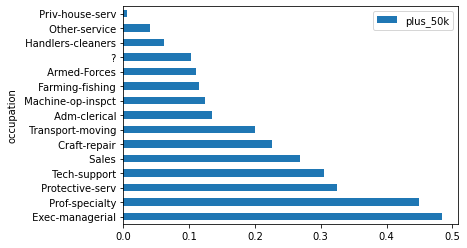

In [20]:
# Visualize result
import matplotlib.pyplot as plt

# get simple plot on the pandas data
df_pandas.plot(kind='barh', x='occupation', y='plus_50k');